In [1]:
# Importing the necessary libraries
import nltk
import numpy as np
import pandas as pd
nltk.download('punkt')
from pprint import pprint
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Reading data
df = pd.read_json('CrackingArena/crackingarena.json')

In [6]:
df.head()

,postID,threadID,threadTitle,URL,subforum,authorName,postAuthorMembership,postAuthorJoinDate,authorReputation,postDate,postSequence,likes,flatContent,contentWithHTMLTag,attachmentName,authorICQ
0,3,2,naked.com with credit,http:/www.crackingarena.com/naked-com-credit-2...,Dead Premium Accounts,kill3r_cool,,Apr 2013,0,"04-08-2013,02:30AM",1,0,You do not have sufficient rights to see the h...,"\r\n\t\t<div id=""post_message_3"">\r\n\t\t\t\r\...",,0
1,4,2,naked.com with credit,http:/www.crackingarena.com/naked-com-credit-2...,Dead Premium Accounts,lolzz,,Apr 2013,0,"04-08-2013,02:38AM",2,0,thnxx xD lolzz,"\r\n\t\t<div id=""post_message_4"">\r\n\t\t\t\r\...",,0
2,5,3,welcome to CrackingArena,http:/www.crackingarena.com/welcome-crackingar...,Old Announcements,kill3r_cool,,Apr 2013,0,"04-08-2013,02:52AM",1,0,Hello to all members we are going to start new...,"\r\n\t\t<div id=""post_message_5"">\r\n\t\t\t\r\...",,0
3,12,2,naked.com with credit,http:/www.crackingarena.com/naked-com-credit-2...,Dead Premium Accounts,audi,,Apr 2013,0,"04-08-2013,03:11PM",3,0,Thanks for this,"\r\n\t\t<div id=""post_message_12"">\r\n\t\t\t\r...",,0
4,14,6,Sql Injection Tutorial Step By Step,http:/www.crackingarena.com/bypass-surveys-173...,Hacking Tutorials,unrated,,Apr 2013,0,"04-08-2013,03:54PM",1,0,SQL Injection Tutorial What is an SQL Injectio...,"\r\n\t\t<div id=""post_message_14"">\r\n\t\t\t\r...",,0


In [7]:
# Reading security vectors
data = open('security_word_vectors.txt').read()
bag_of_security_labels = []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    bag_of_security_labels.append(content[0])

In [8]:
#Removing duplicates from list
bag_of_security_labels = list(dict.fromkeys(bag_of_security_labels))

In [9]:
# Displaying security labels
pprint (bag_of_security_labels[:100])

['internet',
 'botnet',
 'software',
 'stuxnet',
 'operating',
 'computer',
 'smartphone',
 'threat',
 'backdoor',
 'data',
 'authentication',
 'eavesdropping',
 'phishing',
 'trusted',
 'federal',
 'social',
 'cyberwarfare',
 'power',
 'formal',
 'target',
 'bluetooth',
 'exploit',
 'cryptosystem',
 'wi-fi',
 'security',
 'fbi',
 'tampering',
 'malware',
 'hacker',
 'nsa',
 'superuser',
 'anonymous',
 'secure',
 'denial-of-service',
 'wireless',
 'military',
 'smart',
 'passport',
 'common',
 'rfid',
 'automated',
 'electronics',
 'sensor',
 'denial',
 'zombie',
 'equifax',
 'pacemaker',
 'distributed',
 'hacktivism',
 'keystroke',
 'covert',
 'disk',
 'national',
 'vandalism',
 'kgb',
 'email',
 'instant',
 'privilege',
 'bank',
 'milwaukee',
 'form',
 'vulnerability',
 'spoofing',
 'attack',
 'ip',
 'artifact',
 'evil',
 'u.s.',
 'credit',
 'ransomware',
 'black',
 'unix',
 'personal',
 'linux',
 'kernel',
 'nuclear',
 'cybersecurity',
 'department',
 'pan-european',
 'air',
 'firmw

In [10]:
# Counting Labels
tokenized_word = []
label_count = pd.Series([])
for i in range(len(df)):
    tokenized_word = word_tokenize(str(df['flatContent'][i]).lower())
    label_count[i] = len(set(bag_of_security_labels) & set(tokenized_word))
df.insert(16, 'Labels_Count', label_count)

C:\Users\bhave\AppData\Local\Temp\ipykernel_14468\3298359512.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  label_count = pd.Series([])


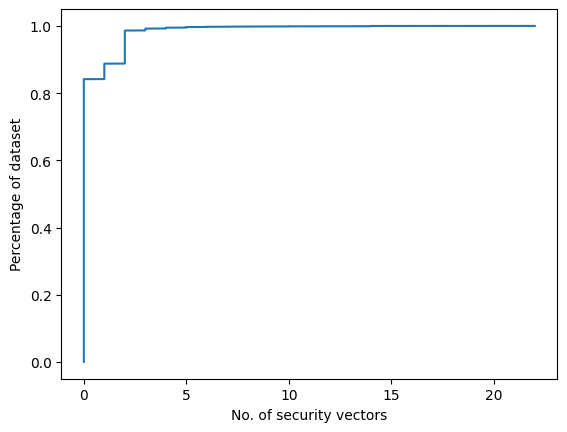

In [11]:
# CDF - Plotting count
x = np.sort(df['Labels_Count'])
y = np.arange(1, len(x)+1) / len(x)
plt.xlabel("No. of security vectors")
plt.ylabel("Percentage of dataset")
plt.plot(x, y)
plt.show()

In [12]:
# Labeling data
tokenized_word = []
label = pd.Series([])
for i in range(len(df)):
    tokenized_word = word_tokenize(df['flatContent'][i].lower())
    if len(set(bag_of_security_labels) & set(tokenized_word)) > 1:
        label[i] = 'Relevant'
    else:
        label[i] = 'Irrelavent'
df.insert(17, 'Labels', label)

C:\Users\bhave\AppData\Local\Temp\ipykernel_14468\2296107577.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  label = pd.Series([])


In [13]:
# Length of Relevant Data
count = 0
total_count = 0
for i in range(len(df)):
    total_count += 1
    if df['Labels'][i] == 'Relevant':
        count += 1
print ('count',count)
print ('total_count',total_count)

count 5047
total_count 44927


In [15]:
# Pruning Dataframe
texts = []
labels = []
authors = []
for i in range(len(df)):
    texts.append(df['flatContent'][i])
    labels.append(df['Labels'][i])
    authors.append(df['authorName'][i])
    
new_df = pd.DataFrame()
new_df['text'] = texts
new_df['label'] = labels
new_df['authors'] = authors
new_df.to_json('crackingarena_pruned.json')

In [17]:
# Saving Json
df = pd.read_json('crackingarena_pruned.json')
df.head()

,text,label,authors
0,You do not have sufficient rights to see the h...,Relevant,kill3r_cool
1,thnxx xD lolzz,Irrelavent,lolzz
2,Hello to all members we are going to start new...,Relevant,kill3r_cool
3,Thanks for this,Irrelavent,audi
4,SQL Injection Tutorial What is an SQL Injectio...,Relevant,unrated
